In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 실행했을때 빨간 (오류)박스를 무시해준다 

In [122]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('data/test.csv')

In [123]:
bus_bts = pd.read_csv('./data/bus_bts.csv')

| train & test 컬럼 | 설명 |
|------|------|
|`id`| 해당 데이터에서의 고유한 ID(train, test와의 중복은 없음) |
|`date`| 날짜 |
|`bus_route_id`| 노선ID |
|`in_out`| 시내버스, 시외버스 구분 |
|`station_code`| 해당 승하차 정류소의 ID |
|`station_name`| 해당 승하차 정류소의 이름 |
|`latitude`| 해당 버스 정류장의 위도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음) |
|`longitude`| 해당 버스 정류장의 경도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음) |
|`X~Y_ride`| X:00:00부터 X:59:59까지 승차한 인원 수 |
|`X~Y_takeoff`| X:00:00부터 X:59:59까지 하차한 인원 수 |
|`18~20_ride`| 18:00:00부터 19:59:59까지 승차한 인원 수 (train data에만 존재) |

| bus_bts 컬럼 | 설명 |
|------|------|
|`user_card_id`| 해당 승객의 버스카드ID |
|`bus_route_id`| 노선ID |
|`vhc_id`| 차량ID |
|`geton_date`| 해당 승객이 탑승한 날짜 |
|`geton_time`| 해당 승객이 탑승한 시간 |
|`geton_station_code`| 승차정류소의 ID |
|`geton_station_name`| 승차정류소의 이름 |
|`getoff_date`| 해당 승객이 하차한 날짜 (하차태그 없는 경우, NaN) |
|`getoff_time`| 해당 승객이 하차한 시간 (하차태그 없는 경우, NaN) |
|`getoff_station_code`| 하차정류소의 ID (하차태그 없는 경우, NaN) |
|`getoff_station_name`| 하차정류소의 이름 (하차태그 없는 경우, NaN) |
|`user_category`| 승객 구분 (01-일반, 02-어린이, 04-청소년, 06-경로, 27-장애 일반, 28-장애 동반, 29-유공 일반, 30-유공 동반) |
|`user_count`| 해당 버스카드로 계산한 인원수 ( ex- 3은 3명 분의 버스비를 해당 카드 하나로 계산한 것) |

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [125]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 날짜 전처리

In [126]:
train['date'] = pd.to_datetime(train['date'])

In [127]:
test['date'] = pd.to_datetime(test['date'])

In [128]:
train['weekday'] = train['date'].dt.weekday

In [129]:
test['weekday'] = test['date'].dt.weekday

In [130]:
train = pd.get_dummies(train, columns = ['weekday'])

In [131]:
test = pd.get_dummies(test, columns = ['weekday'])

In [132]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_takeoff,11~12_takeoff,18~20_ride,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,5.0,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,53.0,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1


### 시내/외 버스 전처리

In [133]:
train['in_out'].value_counts()

시내    408500
시외      6923
Name: in_out, dtype: int64

In [134]:
train['in_out'].replace({'시외': 1, '시내': 0}, inplace=True)

In [135]:
# test 동일 적용
test['in_out'].replace({'시외': 1, '시내': 0}, inplace=True)

### 승하차 인원 전처리

In [136]:
# 2시간 간격으로 묶기
train['6~8_ride'] = train['6~7_ride'] + train['7~8_ride']
train['8~10_ride'] = train['8~9_ride'] + train['9~10_ride']
train['10~12_ride'] = train['10~11_ride'] + train['11~12_ride']

train['6~8_takeoff'] = train['6~7_takeoff'] + train['7~8_takeoff']
train['8~10_takeoff'] = train['8~9_takeoff'] + train['9~10_takeoff']
train['10~12_takeoff'] = train['10~11_takeoff'] + train['11~12_takeoff']

In [137]:
# test 동일 적용
test['6~8_ride'] = test['6~7_ride'] + test['7~8_ride']
test['8~10_ride'] = test['8~9_ride'] + test['9~10_ride']
test['10~12_ride'] = test['10~11_ride'] + test['11~12_ride']

test['6~8_takeoff'] = test['6~7_takeoff'] + test['7~8_takeoff']
test['8~10_takeoff'] = test['8~9_takeoff'] + test['9~10_takeoff']
test['10~12_takeoff'] = test['10~11_takeoff'] + test['11~12_takeoff']

In [138]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', '6~8_ride', '8~10_ride',
       '10~12_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff'],
      dtype='object')

### 승하차 시간 상관 관계 알아보기

In [139]:
ride_df = train[['6~8_ride', '8~10_ride', '10~12_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff', '18~20_ride']]
ride_df

,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff,18~20_ride
0,1.0,7.0,8.0,0.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0,5.0
2,2.0,2.0,0.0,0.0,0.0,0.0,2.0
3,17.0,32.0,30.0,0.0,0.0,0.0,53.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
415418,4.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,4.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415421,1.0,0.0,0.0,0.0,0.0,0.0,0.0


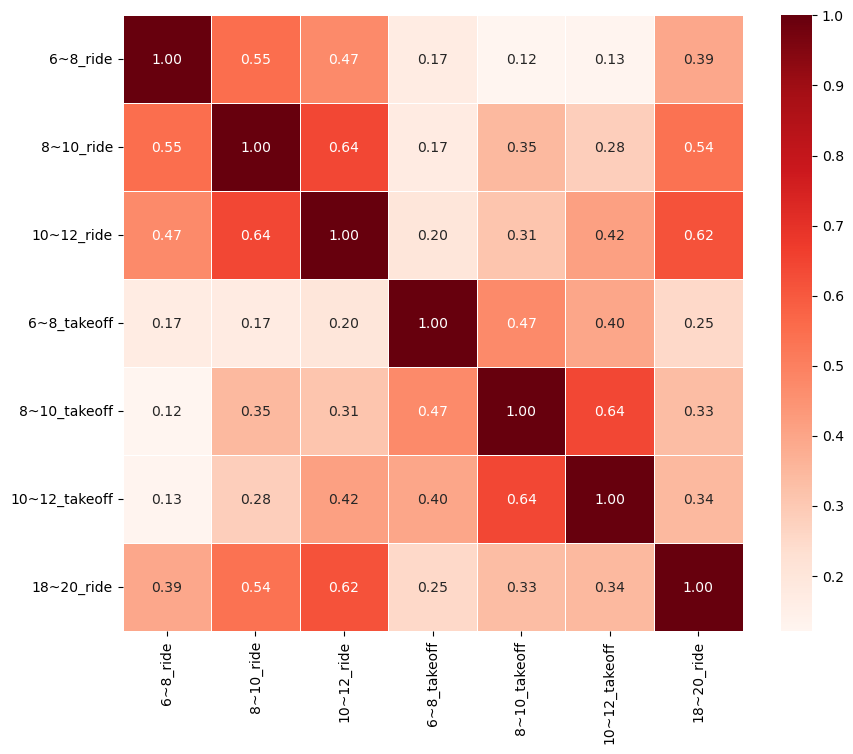

In [140]:
corr = ride_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt ='.2f', cmap='Reds', linewidth=0.5);

In [141]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,weekday_3,weekday_4,weekday_5,weekday_6,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0,0,0,1,1.0,7.0,8.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,0,0,0,1,5.0,6.0,11.0,0.0,0.0,0.0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0,0,0,1,2.0,2.0,0.0,0.0,0.0,0.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0,0,0,1,17.0,32.0,30.0,0.0,0.0,0.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', '6~8_ride', '8~10_ride',
       '10~12_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff'],
      dtype='object')

# map 시각화

In [143]:
import folium                             # 지도 시각화를 위한 folium 라이브러리
from folium.plugins import MarkerCluster # 지도 마커 표시를 위한 folium 플러그인

In [144]:
# 지도에 표시할 항목만 데이터 추출 (위도, 경도, 정류장 이름)
station_df = train[['latitude', 'longitude', 'station_name']].drop_duplicates(keep = 'first') # default가 first -> 처음에 발견한 데이터를 제외하고 중복데이터를 마크하거나 삭제함
station_df # 중복 삭제 후 station_df 저장

,latitude,longitude,station_name
0,33.48990,126.49373,제주썬호텔
1,33.48944,126.48508,한라병원
2,33.48181,126.47352,정존마을
3,33.50577,126.49252,제주국제공항(600번)
4,33.25579,126.41260,중문관광단지입구
...,...,...,...
374291,33.96252,126.29429,대서리
393524,33.33595,126.26332,저지리알못
397921,33.25899,126.27554,어썸브리즈
400433,33.43489,126.73242,셰프라인월드


In [145]:
# 정류장 이름으로 그룹화를 하고 위도 경도 평균을 station_df2 에 저장한다
station_df2 = station_df.groupby(['station_name'])['latitude','longitude'].mean()
station_df2 

,latitude,longitude
station_name,,
(구)구판장,33.329705,126.797965
(구)중문동주민센터,33.251085,126.434300
(구)중앙파출소,33.247370,126.560713
(구)화산초등학교,33.326260,126.797250
1100고지휴게소,33.357820,126.463010
...,...,...
흙통,33.262150,126.582590
흥국사,33.452535,126.378260
흥덕사,33.399080,126.876030


In [146]:
station_df2.to_csv('foilum.csv')

In [147]:
# 'groupby'로 인해 "station_name"이 index로 변환되었기 때문에
# 다시 csv로 저장하고 불러오면 "station_name"은 다시 컬럼으로 바뀌어 온다

station_df2 = pd.read_csv('foilum.csv')

In [148]:
# 제주도가 위치한 위도 경도(아무 곳이나 상관없다)를 location에 각각 적어준다
# 단 zoom_start(줌인 사이즈) 는 제주도가 다 보일 정도로 설정한다

map_osm= folium.Map(location =[33.399835, 126.506031] ,zoom_start=9)

In [149]:
# folium의 플러그인 MarkerCluster()를 mc 변수에

mc = MarkerCluster()

In [150]:
# 여러가지 위치정보를 담아있기때문에 for문을 돌려준다

# itertuples() : 이름이 있는 튜플 (인덱스, 행, 열) 에 대해 순환 반복
for row in station_df2.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude], popup= row.station_name))
    map_osm.add_child(mc)

map_osm

## 위도, 경도 거리 차

In [151]:
import geopy.distance
from geopy import distance

In [152]:
jeju=(33.51411, 126.52969)
gosan=(33.29382, 126.16283)
seongsan=(33.38677, 126.8802)
po=(33.24616, 126.5653)

In [154]:
t1 = [geopy.distance.geodesic( (i,j), jeju).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t2 = [geopy.distance.geodesic( (i,j), gosan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t3 = [geopy.distance.geodesic( (i,j), seongsan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t4 = [geopy.distance.geodesic( (i,j), po).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
train['dis_jeju']=t1
train['dis_gosan']=t2
train['dis_seongsan']=t3
train['dis_po']=t4

- test에도 동일하게 적용

In [155]:
test['dis_jejusi'] = [geopy.distance.geodesic((test['latitude'].iloc[i],test['longitude'].iloc[i]), coords_jejusi).km for i in range(len(test))]
test['dis_seoquipo'] = [geopy.distance.geodesic((test['latitude'].iloc[i],test['longitude'].iloc[i]), coords_seoquipo).km for i in range(len(test))]

In [156]:
t1 = [geopy.distance.geodesic( (i,j), jeju).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t2 = [geopy.distance.geodesic( (i,j), gosan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t3 = [geopy.distance.geodesic( (i,j), seongsan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t4 = [geopy.distance.geodesic( (i,j), po).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
test['dis_jeju']=t1
test['dis_gosan']=t2
test['dis_seongsan']=t3
test['dis_po']=t4

## label encoding

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le = LabelEncoder()

label = ['bus_route_id', 'station_code', 'station_name']

for i in label:
    le.fit(train[i])
    train[i] = le.transform(train[i])

In [159]:
train.head(2)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,weekday_3,weekday_4,weekday_5,weekday_6,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff
0,0,2019-09-01,0,1,321,1481,33.48990,126.49373,0.0,1.0,...,0,0,0,1,1.0,7.0,8.0,0.0,0.0,0.0
1,1,2019-09-01,0,1,334,1822,33.48944,126.48508,1.0,4.0,...,0,0,0,1,5.0,6.0,11.0,0.0,0.0,0.0


In [160]:
le = LabelEncoder()

label = ['bus_route_id', 'station_code', 'station_name']

for i in label:
    le.fit(test[i])
    test[i] = le.transform(test[i])

In [161]:
test.head(2)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,weekday_3,weekday_4,weekday_5,weekday_6,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff
0,415423,2019-10-01,0,1,322,1478,33.48990,126.49373,4.0,4.0,...,0,0,0,0,8.0,9.0,10.0,0.0,0.0,1.0
1,415424,2019-10-01,0,1,335,1817,33.48944,126.48508,1.0,6.0,...,0,0,0,0,7.0,7.0,19.0,0.0,0.0,0.0


In [162]:
train.to_csv('bus_train.csv', index = False)
test.to_csv('bus_test.csv', index = False)

## 요일별 18~20 탑승인원 평균, 합

In [163]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train['date'].dt.weekday
test['date'] = pd.to_datetime(test['date'])
test['weekday'] = test['date'].dt.weekday

In [164]:
train['bus_route_id_weekday'] = train['bus_route_id'].astype(str) + ',' + train['weekday'].astype(str)
test['bus_route_id_weekday'] = test['bus_route_id'].astype(str) + ',' + test['weekday'].astype(str) 

In [165]:
f = train.groupby(['bus_route_id_weekday'])['18~20_ride'].agg([('mean_bus_weekday_ride','mean')]).reset_index()
tr = pd.merge(train, f, how='left', on='bus_route_id_weekday')
te = pd.merge(test, f, how='left', on='bus_route_id_weekday').fillna(f['mean_bus_weekday_ride'].mean())

def id_statistic(ID, col1, col2) :
# 요일, 평일
    # mean, sum
    rs_mean = train.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]).reset_index()
    # 요일별 18~20 탑승인원 평균
    rs_sum = train.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]).reset_index()
     # 요일별 18~20 탑승인원 합
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)
    # merge
    tr = pd.merge(train, rs_mean_sum, how='left', on=ID)
    # train 데이터에 평균값 합치기
    te = pd.merge(test, rs_mean_sum, how='left', on=ID)
    # test 데이터에 탑승인원 합 합치기
    return tr, te

In [166]:
train, test = id_statistic('weekday', '1820_w_mean', '1820_w_sum')

In [167]:
train.to_csv('bus_train2.csv', index = False)
test.to_csv('bus_test2.csv', index = False)

- 위치별 18~20 탑승 인원

In [168]:
df1.to_csv('18~20_test.csv')
df2 = pd.read_csv('18~20_test.csv')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

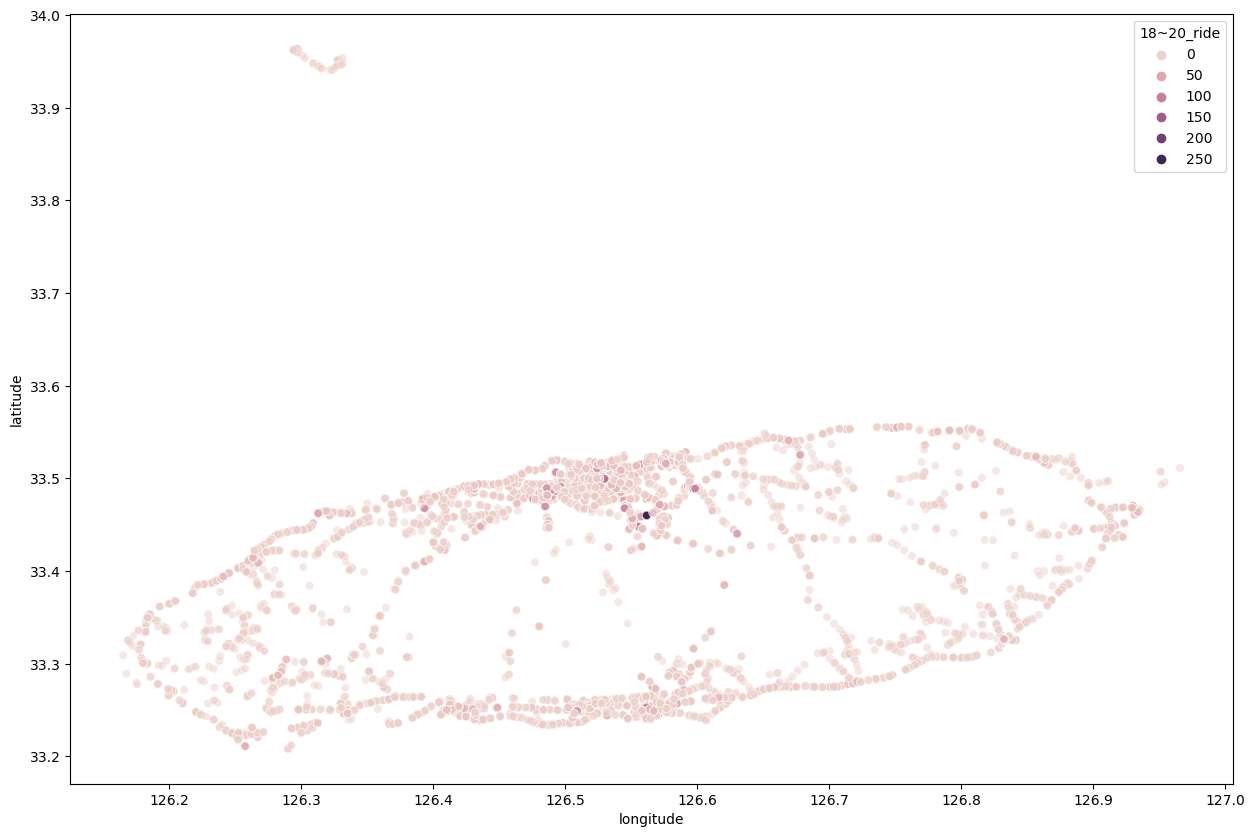

In [169]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x=df2.longitude, y=df2.latitude, hue='18~20_ride', alpha=0.5)